In [1]:
%matplotlib inline

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import learning_curve
import random
import time

# MNIST example: linear SVM and deep feed-forward ANN

In [56]:
train = pd.read_csv('data/train.csv')

In [30]:
# Auxiliary functions
def get_image(index, train):
    im = train.iloc[index]
    if 'label' in train:
        im = im.drop('label')
    im = im.values
    im = im.reshape(28, 28)
    return im

def get_sample(index, train):
    return train.iloc[index].values

def plot_image(index, train):
    plt.imshow(get_image(index, train), cmap='gray_r')

## 1. Exemplary numbers from the data set

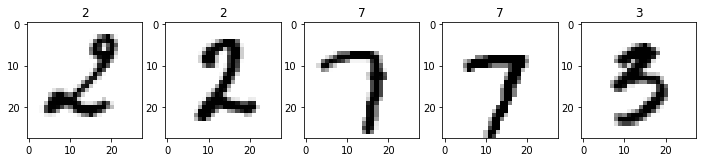

In [91]:
fig, axes = plt.subplots(1, 5, figsize=(12, 5))
for i in range(len(axes)):
    n = random.randint(0, train.index.size)
    axes[i].imshow(get_image(n, train), cmap='gray_r')
    axes[i].set_title(train.iloc[n]['label'])

## 2. Linear SVM classifier

### 2.1 Training

Firstly, split data into training (80%) and validation (20%) sets:

In [66]:
def get_XY(train, start, end):
    X = train.iloc[start:end].drop('label', axis=1).values
    Y = train['label'].iloc[start:end]
    return X, Y

# Training set
Xtrn, Ytrn = get_XY(train, 0, int(0.9 * 42000))

# Validation set
Xvld, Yvld = get_XY(train, int(0.9 * 42000) + 1, 42000)

Now, let's test the model on different training data volumes:

In [156]:
time0 = time.time()
train_sizes, train_scores, valid_scores = learning_curve(
    svm.LinearSVC(), Xtrn, Ytrn, train_sizes=[100, 500, 1000, 5000, 10000, 25000], cv=5, n_jobs=3)
time1 = time.time()
print('Cross-validation finished in: {:.1f}s'.format(time1-time0))

Cross-validation finished in: 174.5s


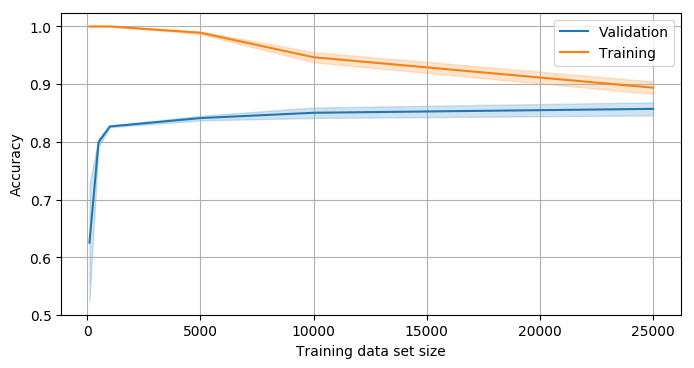

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=100);
vld_mean = valid_scores.mean(axis=1)
vld_std  = valid_scores.std(axis=1)
trn_mean = train_scores.mean(axis=1)
trn_std  = train_scores.std(axis=1)
ax.plot(train_sizes, vld_mean, c='C0', label='Validation');
ax.fill_between(train_sizes, vld_mean - vld_std, vld_mean + vld_std, color='C0', alpha=0.2);
ax.plot(train_sizes, train_scores.mean(axis=1), c='C1', label='Training');
ax.fill_between(train_sizes, trn_mean - trn_std, trn_mean + trn_std, color='C1', alpha=0.2);
ax.legend();
ax.grid();
ax.set_xlabel('Training data set size');
ax.set_ylabel('Accuracy');

Currently, the training data set contains 37800 samples (80% of all data). The above figure shows that the model performance does not improve significantly on data sets with more than 10000 samples, meaning that we have enough data in the training set. The average accuracy of the linear SVM is not very impressive, but at least its fast to train. 

Let's train the model on all 37800 samples before moving to the validation data:

In [158]:
clf = svm.LinearSVC()
clf.fit(Xtrn, Ytrn)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### 2.2. Validation

The validation accuracy is equal to

In [159]:
print('{:.2f}%,'.format(clf.score(Xvld, Yvld) * 100.))

84.07%,


which is similar to the one presented in the learning curve figure. Exemplary predictions:

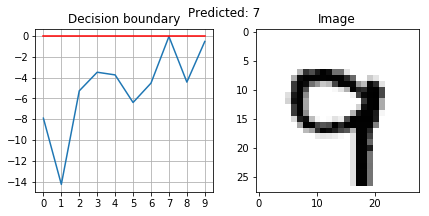

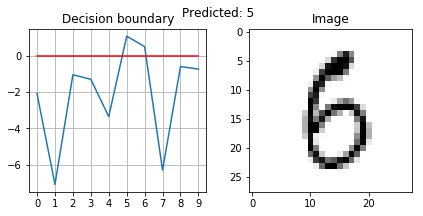

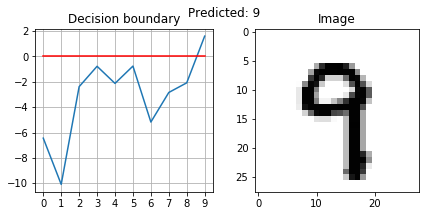

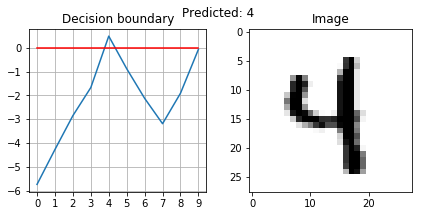

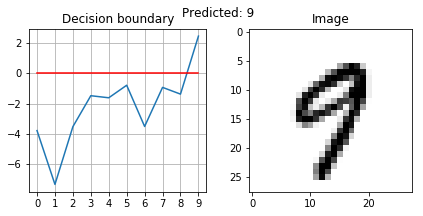

In [165]:
for sample in np.random.randint(0, Xvld.shape[0], 5):
    fig, axes = plt.subplots(1, 2, figsize=(7, 3))
    ax = axes[0]
    ax.set_title('Decision boundary')
    ax.plot(clf.decision_function(Xvld)[sample])
    ax.plot(np.zeros(10), color='r')
    ax.set_xticks(np.arange(0, 10, 1))
    ax.grid(True)
    ax = axes[1]
    ax.set_title('Image')
    ax.imshow(Xvld[sample].reshape((28,28)), cmap='gray_r')
    fig.suptitle('Predicted: {}'.format(clf.predict([Xvld[sample]])[0]))

## 3. Deep feed-forward ANN

### 3.1. Training

In [166]:
pass